## Import Libraries

In [3]:
#DS Basics
import numpy as np
import pandas as pd

In [4]:
# import libraries
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#SKLearn stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#estimator
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

#model metrtics
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report

#cross validation
from sklearn.model_selection import cross_val_score

## Reading dataset

In [6]:
# import data
df = pd.read_csv('insurance.csv') 

## Analysis

In [7]:
# show 1st 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
# examine the shape

df.shape  ## 1338 rows x 7 columns

(1338, 7)

In [10]:
# data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# find out min / max / avg etc
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# checking for missing value

df.isnull()  # no missing value

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


### Examine no. of customers by sex / smoker / region

In [14]:
# Number of customers in Sex column
df.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



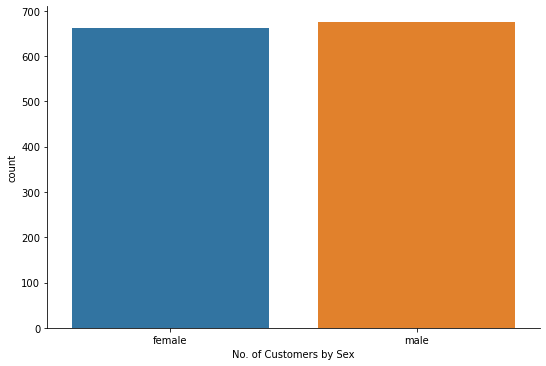

In [15]:
# Instead of a group by, use seaborn to plot the count of customers in each sex category
fg = sns.factorplot('sex', data=df, kind='count', aspect=1.5)
fg.set_xlabels('No. of Customers by Sex')

In [16]:
# Number of customers in Smoker column
df.groupby('smoker')['smoker'].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



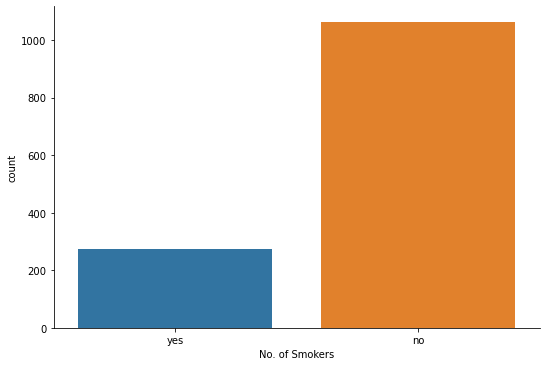

In [17]:
# plot smoker count by sex

fg = sns.factorplot('smoker', data=df, kind='count', aspect=1.5)
fg.set_xlabels('No. of Smokers')

In [18]:
# count of regions
df.groupby('region')['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



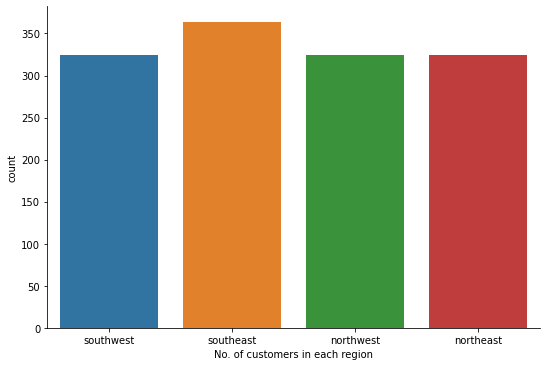

In [19]:
# plot count of regions

fg = sns.factorplot('region', data=df, kind='count', aspect=1.5)
fg.set_xlabels('No. of customers in each region')

### Examine relationship between charges with Sex / children / smoker / region

<AxesSubplot:xlabel='sex', ylabel='charges'>

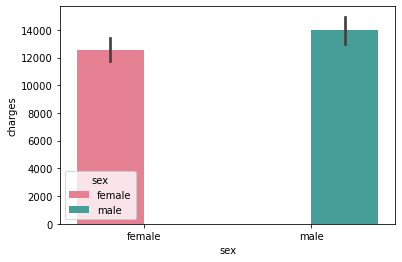

In [20]:
# examine difference of sex with charges

sns.barplot(x='sex', y='charges', hue='sex', data=df, palette='husl')

<AxesSubplot:xlabel='children', ylabel='charges'>

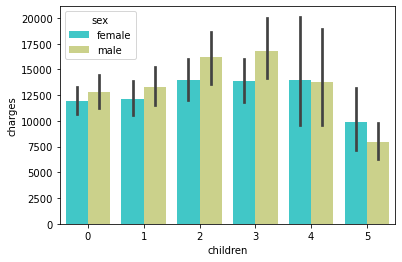

In [21]:
# examine effect of no. of children with sex

sns.barplot(x='children', y='charges', hue='sex', data=df, palette='rainbow')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

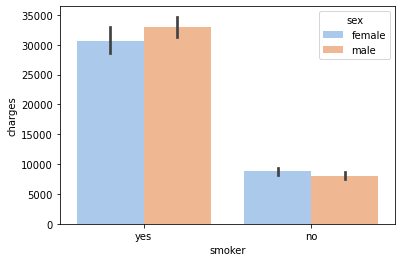

In [22]:
# examine effect of smoker on charges

sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='pastel')

<AxesSubplot:xlabel='region', ylabel='charges'>

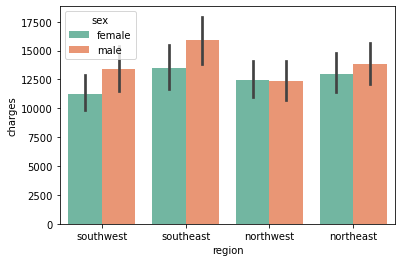

In [23]:
# examine relationship between regin and charges 

sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2')

In [24]:
# df['age_qcut']=pd.qcut(df['age'], 6, labels = False)
# y = df['age_qcut']      
# y

In [25]:
# custom_bucket_array=[10, 20, 30, 40, 50, 60, 70]
# ageBucket = custom_bucket_array

In [26]:
# ageLabel = pd.cut(df['age'], custom_bucket_array, labels=False)
# df.info()

In [27]:
### convert sex / smoker / region from object to int using label encoder

le=LabelEncoder()
LabelEncoder()
le.fit(df['sex'])
df['sex']=le.transform(df['sex'])

le.fit(df['smoker'])
df['smoker']=le.transform(df['smoker'])

le.fit(df['region'])
df['region']=le.transform(df['region'])

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

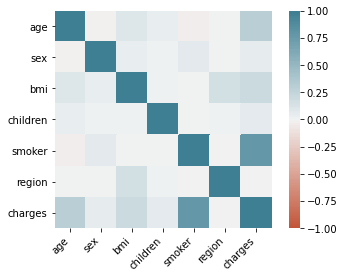

In [28]:
# plot heatmap to show correlation 

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Text(0.5, 1.0, 'Correlation matrix')

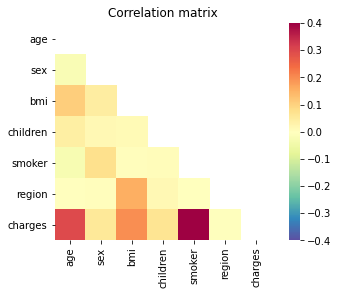

In [29]:
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

### Relationship between age and charges

In [30]:
df.groupby("age")[["charges"]].mean().sort_values("charges", ascending = False)

,charges
age,
64,23275.530837
61,22024.457609
60,21979.418507
63,19884.998461
43,19267.278653
62,19163.856573
59,18895.869532
54,18758.546475
52,18256.269719


In [31]:
df.groupby("age")[["charges"]].mean().sort_values("charges", ascending = True)

,charges
age,
21,4730.464330
26,6133.825309
18,7086.217556
38,8102.733674
28,9069.187564
32,9220.300291
41,9653.745650
19,9747.909335
25,9838.365311


In [32]:
# creating new feature "age_range" by using age attribute

df["age_range"] = 1000
for i in range(len(df["age"])):
    if df["age"][i]<30:
        df["age_range"][i] = 1
    elif df["age"][i] >=30 and df["age"][i]<45:
        df["age_range"][i] = 2
    elif df["age"][i] >=45:
        df["age_range"][i] = 3

<ipython-input-32-42fab5a75f82>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-42fab5a75f82>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-42fab5a75f82>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,2
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,3
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,1


In [34]:
df.groupby("age_range")[["charges"]].mean()

,charges
age_range,
1,9182.487125
2,12490.912530
3,17070.491773


<AxesSubplot:xlabel='age_range', ylabel='charges'>

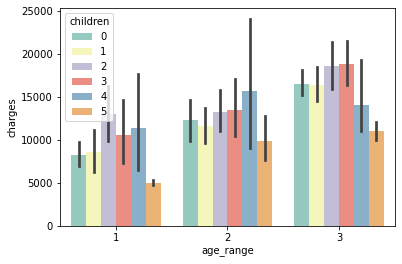

In [35]:
# plot to show relationship

sns.barplot(x='age_range', y='charges', hue='children', data=df, palette='Set3')

<AxesSubplot:xlabel='region', ylabel='charges'>

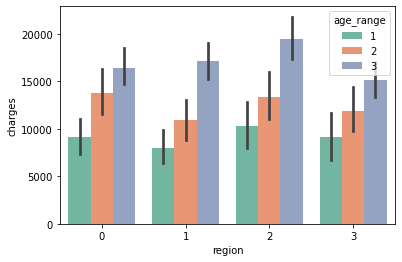

In [36]:
# relationship between reionn / charges / age_range

sns.barplot(x='region', y='charges', data=df, hue= "age_range", palette='Set2')

### Relationship betwween bmi and charges

In [37]:
df.groupby("bmi")[["charges"]].mean().sort_values("charges", ascending = False)

,charges
bmi,
47.41,63770.42801
30.36,62592.87309
36.40,51194.55914
36.96,49577.66240
37.70,48824.45000
...,...
35.40,1263.24900
20.70,1242.81600
20.30,1242.26000


In [38]:
# creating new feature "bmi_range" by using age attribute

df["bmi_range"] = 1000
for i in range(len(df["bmi"])):
    if df["bmi"][i]<30:
        df["bmi_range"][i] = 1
    elif df["bmi"][i] >=30 and df["bmi"][i]<42:
        df["bmi_range"][i] = 2
    elif df["bmi"][i] >=42:
        df["bmi_range"][i] = 3

<ipython-input-38-54e2f31617b3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-54e2f31617b3>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-54e2f31617b3>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,0,27.900,0,1,3,16884.92400,1,1
1,18,1,33.770,1,0,2,1725.55230,1,2
2,28,1,33.000,3,0,2,4449.46200,1,2
3,33,1,22.705,0,0,1,21984.47061,2,1
4,32,1,28.880,0,0,1,3866.85520,2,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,3,2
1334,18,0,31.920,0,0,0,2205.98080,1,2
1335,18,0,36.850,0,0,2,1629.83350,1,2
1336,21,0,25.800,0,0,3,2007.94500,1,1


In [40]:
df.groupby("bmi_range")[["charges"]].mean()

,charges
bmi_range,
1,10713.666901
2,15417.353630
3,17364.948728


<AxesSubplot:xlabel='bmi_range', ylabel='charges'>

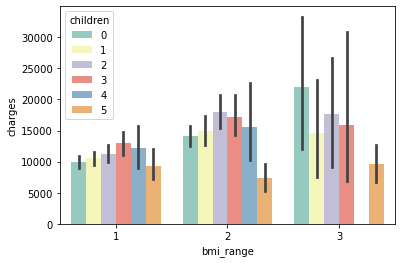

In [41]:
# plot to show relationship

sns.barplot(x='bmi_range', y='charges', hue='children', data=df, palette='Set3')

<AxesSubplot:xlabel='region', ylabel='charges'>

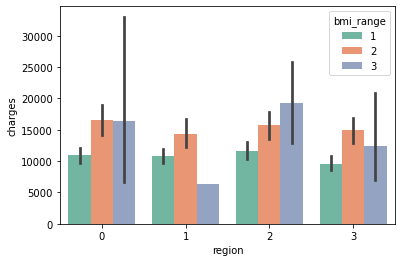

In [42]:
# relationship between region / charges / bmi_range

sns.barplot(x='region', y='charges', data=df, hue= "bmi_range", palette='Set2')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

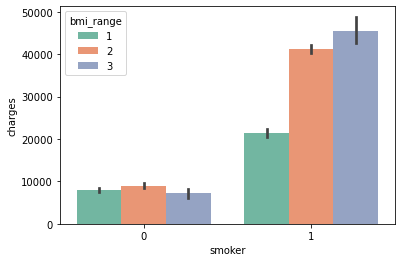

In [43]:
# relationship between smoker / charges / bmi_range ( 0=no, 1=yes)

sns.barplot(x='smoker', y='charges', data=df, hue= "bmi_range", palette='Set2')

<AxesSubplot:xlabel='children', ylabel='charges'>

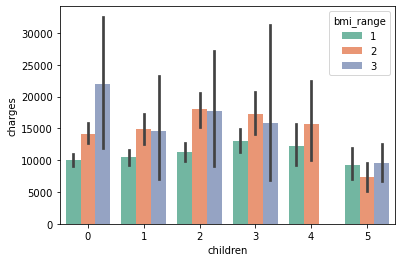

In [44]:
# relationship between no of children / charges / bmi_range 

sns.barplot(x='children', y='charges', data=df, hue= "bmi_range", palette='Set2')

<AxesSubplot:xlabel='age_range', ylabel='charges'>

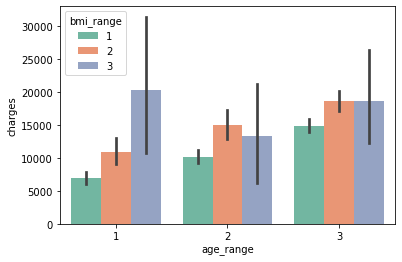

In [45]:
# relationship between age_range / charges / bmi_range 

sns.barplot(x='age_range', y='charges', data=df, hue= "bmi_range", palette='Set2')

<AxesSubplot:xlabel='bmi_range', ylabel='charges'>

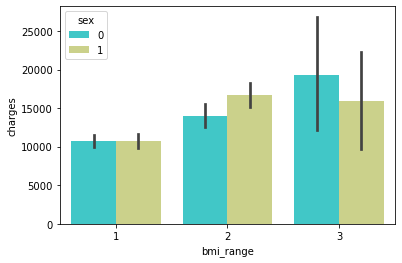

In [46]:
# relationship between sex / charges / bmi_range  (0=female, 1=male)

sns.barplot(x='bmi_range', y='charges', data=df, hue= "sex", palette='rainbow')

## Training Models

In [47]:
# set X & Y value

X = df.iloc[:,0:6]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [48]:
y = df['charges']

In [51]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((936, 6), (402, 6))

In [66]:
#Model Choice
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()
modelGB = GradientBoostingRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=3)

##### Random Forest  Model Fitting and Scoring

In [73]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.83733897 0.73767865 0.83103335 0.8457262  0.84761634]


0.9755644928634404

#####  Linear Regression Model Fitting and Scoring

In [68]:
#Model Fitting
modelLR.fit(X_train, y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[0.77187579 0.70630954 0.72823367 0.74052986 0.73496389]


0.7454618032357492

##### Support Vector Regression  Model Fitting and Scoring

In [70]:
#Model Fitting
modelSVR.fit(X_train, y_train)
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train,y_train)

[-0.13260879 -0.02342245 -0.13557047 -0.12487449 -0.12924367]


-0.10462875610353106

##### Gradient Boosting Regressor Model Fitting and Scoring

In [71]:
#Model Fitting
modelGB.fit(X_train, y_train)
print(cross_val_score(modelGB, X_train, y_train))
modelGB.score(X_train,y_train)

[0.84932145 0.7746306  0.84416949 0.86911898 0.84678604]


0.8982297232136414

##### KNearest Neighbor Regressor Model Fitting and Scoring

In [72]:
#Model Fitting
modelKNN.fit(X_train, y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

[ 0.12267279 -0.0529228   0.10655477  0.08147895  0.0322423 ]


0.5356307975670695

##### Training Model Performance

In [74]:
#Model Performance (Random Forest)
rSquared = modelRF.score(X_train,y_train)
mse = np.mean((modelRF.predict(X_test) - y_test) ** 2)

print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 20389119.64: (Lower numbers are better)
R Squared of training: 0.98: (Higher numbers are better, but be careful of overfitting)


In [75]:
#Model Performance (Linear Regression)
rSquared = modelLR.score(X_train,y_train)
mse = np.mean((modelRF.predict(X_test) - y_test) ** 2)

print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 20389119.64: (Lower numbers are better)
R Squared of training: 0.75: (Higher numbers are better, but be careful of overfitting)


In [76]:
#Model Performance (Support Vector Regression)
rSquared = modelSVR.score(X_train,y_train)
mse = np.mean((modelRF.predict(X_test) - y_test) ** 2)

print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 20389119.64: (Lower numbers are better)
R Squared of training: -0.10: (Higher numbers are better, but be careful of overfitting)


In [77]:
#Model Performance (Gradient Boosting Regression)
rSquared = modelGB.score(X_train,y_train)
mse = np.mean((modelGB.predict(X_test) - y_test) ** 2)

print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 17039828.11: (Lower numbers are better)
R Squared of training: 0.90: (Higher numbers are better, but be careful of overfitting)


In [78]:
#Model Performance (KNearest Neighbour Regression)
rSquared = modelKNN.score(X_train,y_train)
mse = np.mean((modelKNN.predict(X_test) - y_test) ** 2)

print('Mean squared error: %.2f' % mse + ': (Lower numbers are better)')
print('R Squared of training: %.2f' % rSquared + ': (Higher numbers are better, but be careful of overfitting)')

Mean squared error: 147536158.45: (Lower numbers are better)
R Squared of training: 0.54: (Higher numbers are better, but be careful of overfitting)


In [84]:

predictions = modelGB.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.881
RMSE: 4127.933


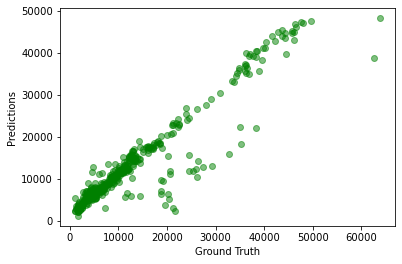

In [85]:
# plotting the results

plt.scatter(y_test, predictions, color=['green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [89]:
result = pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame(predictions,columns=["prediction"])],axis=1)
del result["index"]
result

,charges,prediction
0,9800.88820,10501.664414
1,4667.60765,7138.088420
2,34838.87300,36285.893616
3,5125.21570,7668.679272
4,12142.57860,14885.224479
...,...,...
397,6593.50830,8767.470001
398,1759.33800,2879.645062
399,18648.42170,18513.838219
400,5272.17580,5482.764040


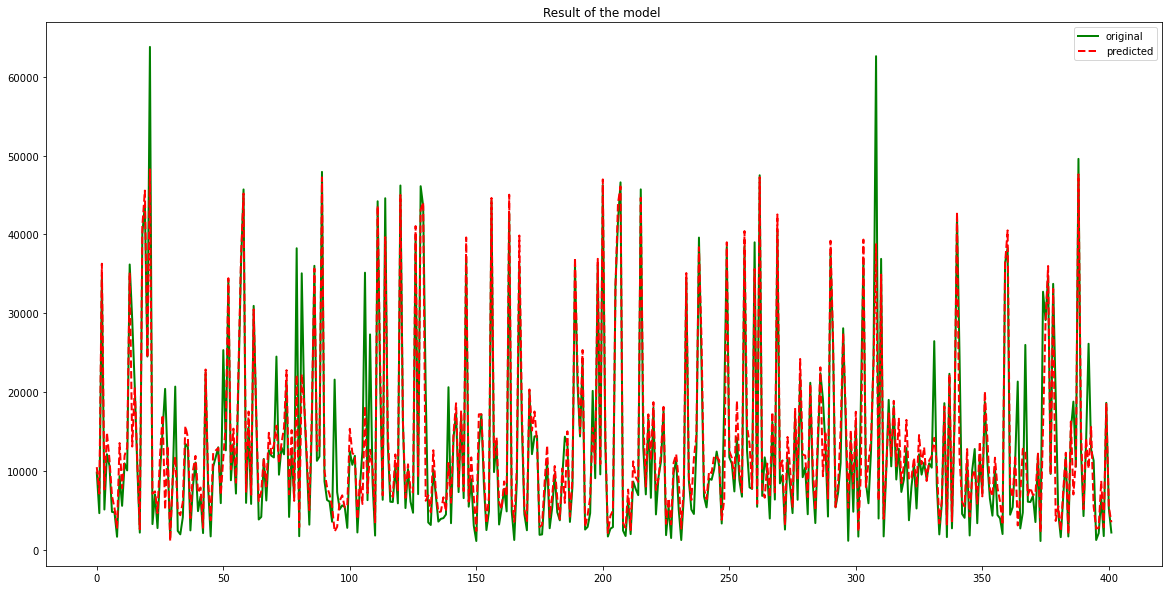

In [94]:
plt.figure(figsize=(20,10))
plt.plot(result["charges"], "green", linewidth=2)
plt.plot(result["prediction"], "r--", linewidth = 2)
plt.legend(["original","predicted"])
plt.title("Result of the model ")
plt.show()

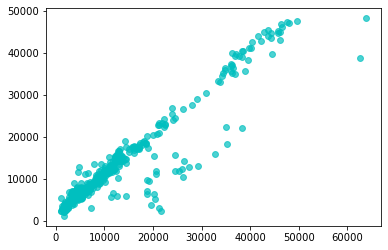

In [93]:
plt.scatter(x=y_test,y=predictions,c = 'c', marker = 'o', s = 35, alpha = 0.7)

## Feature Importance

In [95]:
Importance = pd.DataFrame({"Importance": modelGB.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Feature Importance')

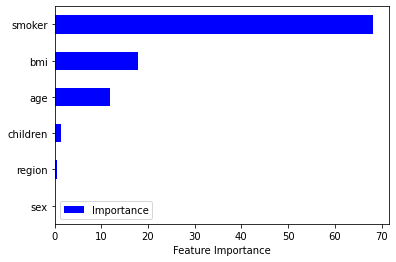

In [98]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "blue")

plt.xlabel("Feature Importance")